# Climate Observations: Data Analysis and Visualization

In this project climate data for a city in Bavaria, Germany, is read in, the data is cleaned and made more readable and in the following analyzed using different statistical methods.
Since my research does not include working with data sets, I wanted to use this project to learn more about data science, i.e. working with data sets and presenting them. Moreover, I did some literature search on how to present climate data and apply some statistical methods on it.
The project work consisted of the following steps: searching for freely available climate data sets, reading in the data and getting a first overview, followed by some literature search on how to work with and interpret climate data.
*more about the project here*

## General Information

The following map of Europe shows where Regensburg is located and provides some basic information about the city.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
from bokeh.palettes import Category10
from bokeh.models import GeoJSONDataSource, ColumnDataSource, HoverTool, Title
from bokeh.transform import factor_cmap
from bokeh.models.widgets import Slider
from bokeh.layouts import column, row, WidgetBox

In [2]:
RGBGdata = pd.DataFrame({'country': 'Germany', 'state': 'Bavaria', 'station': 'Regensburg', 'area': [8076], 'population': [153094],
                       'lat': [49.1], 'lon': [12.5]})

source = ColumnDataSource( data = RGBGdata )

location = {'RGBG': {'lat':49.1,'lon':12.5}}

europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geo_source = GeoJSONDataSource(geojson=europe.to_json())

#get map with tools on the left (they are self-explaining)
p = figure(tools = "pan, wheel_zoom, reset", x_range = (-30, 60), y_range = (30, 85), 
           x_axis_location=None, y_axis_location=None, plot_width=800, plot_height=700)

p.title.text = 'Map of Europe with Regensburg'

p.add_layout(Title(text='Data taken from Wikipedia https://en.wikipedia.org/wiki/Regensburg', align='left',
       text_font_size="10px", text_color='blue'), "below")

#remove grid on map
p.xgrid.visible = False
p.ygrid.visible = False

p.patches('xs', 'ys', fill_alpha=0,
    line_color=Category10[10][7], line_width=1.5, source=geo_source)

glyph = p.scatter('lon','lat', source = source, 
              size = 5, fill_alpha = .5, hover_fill_alpha = 1.0,
              marker = 'circle',
              legend_label = 'Regensburg')

glyph_hover = HoverTool(renderers=[glyph],
                         tooltips=[('Sation','@station'),('Longitude','@lon E'), ('Latitude','@lat N'),
                                  ('Country','@country'), ('State','@state'), ('Population','@population'),
                                  ('Area','@area')])
p.add_tools(glyph_hover)

p.title.align = 'center'
p.legend.location = 'top_left'

output_notebook()
show(p)

Loading BokehJS ...

## Data Processing

The data is downoladed from [this url](https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html?nn=16102) and provides weather data for the Germay city Regensburg.

Read in the data, clean it and make it more readable. Read in the data given as a text file using pandas.

In [3]:
df = pd.read_table('Data/produkt_klima_tag_18790101_20191231_04104.txt',header=0,sep=';|\t',engine='python')

In [4]:
df.head() #check at how the data actually looks like in the beginnign

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,4104,18790101,-999,-999.0,-999.0,1,2.2,1,-999.0,-999,4.0,6.0,972.0,4.4,72.0,9.3,1.5,-999.0,eor
1,4104,18790102,-999,-999.0,-999.0,1,0.5,7,-999.0,-999,-999.0,5.7,965.5,3.3,69.0,8.1,0.6,-999.0,eor
2,4104,18790103,-999,-999.0,-999.0,1,3.9,8,-999.0,-999,-999.0,5.1,967.1,0.5,83.0,1.9,-3.0,-999.0,eor
3,4104,18790104,-999,-999.0,-999.0,1,0.3,7,-999.0,-999,-999.0,6.5,960.6,3.6,78.0,8.1,0.1,-999.0,eor
4,4104,18790105,-999,-999.0,-999.0,1,0.6,7,-999.0,-999,6.7,4.7,972.4,-0.3,80.0,1.5,-2.5,-999.0,eor


Clean the data, i.e. delete unnecessary columns or columns that are not of interest for this project.

In [5]:
df.drop(columns='STATIONS_ID',inplace=True) #delete the unnecessary station ID column, we consider only one station ID
df.drop(columns='QN_3',inplace=True) #delete the column describing measurement quality
df.drop(columns='QN_4',inplace=True) #delete the column describing measurement quality
df.drop(columns='RSKF',inplace=True) #delete the column describing numerical code for precipitation
#df.drop(columns='TGK',inplace=True) #delete the column describing minimal temperature at 5cm height
df.drop(columns='eor',inplace=True) #delete the unnecessary eor (end of row) column
#df.head()

Change the names in the table since they are not clear. Description of the abbreviations can be found (in German) in the html file.

In [6]:
df.columns = ['date','max wind peak value','average wind velocity','precipitation level','sun hours',
              'snow height','average degree of coverage','average degree of vaport pressure',
              'average air pressure','average temperature','average relative humidity',
              'max temperature','min temperature','min temperature 5cm']
#df.head()

Replace the index by the date information and replace it by pandas datetime form and create multiindex for year-month-day.

In [7]:
df.set_index(['date'],inplace=True)
df.index = pd.to_datetime(df.index, format='%Y%m%d') #use pandas datetime option
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df.set_index(['year','month','day'],inplace=True)
#df.head()

In [8]:
df = df.replace([-999],np.nan) #replace all non-given values (-999) by numpy NaN

In [9]:
df.head() #check how the data looks now

max wind peak value  average wind velocity  \
year month day                                               
1879 1     1                    NaN                    NaN   
           2                    NaN                    NaN   
           3                    NaN                    NaN   
           4                    NaN                    NaN   
           5                    NaN                    NaN   

                precipitation level  sun hours  snow height  \
year month day                                                
1879 1     1                    2.2        NaN          NaN   
           2                    0.5        NaN          NaN   
           3                    3.9        NaN          NaN   
           4                    0.3        NaN          NaN   
           5                    0.6        NaN          NaN   

                average degree of coverage  average degree of vaport pressure  \
year month day                                                                  
1879 1     1                           4.0                                6.0   
           2                           NaN                                5.7   
           3                           NaN                                5.1   
           4                           NaN                                6.5   
           5                           6.7                                4.7   

                average air pressure  average temperature  \
year month day                                              
1879 1     1                   972.0                  4.4   
           2                   965.5                  3.3   
           3                   967.1                  0.5   
           4                   960.6                  3.6   
           5                   972.4                 -0.3   

                average relative humidity  max temperature  min temperature  \
year month day                                                                
1879 1     1                         72.0              9.3              1.5   
           2                         69.0              8.1              0.6   
           3                         83.0              1.9             -3.0   
           4                         78.0              8.1              0.1   
           5                         80.0              1.5             -2.5   

                min temperature 5cm  
year month day                       
1879 1     1                    NaN  
           2                    NaN  
           3                    NaN  
           4                    NaN  
           5                    NaN

Safe the processed data to the disk. 

In [10]:
#output = pd.ExcelWriter('Data/ClimateRgbg.xlsx')
#df.to_excel(output,'Sheet1')
#output.save()

## Data visualization

Define global settings for all figures.

In [32]:
plt.rcParams.update({ 'figure.figsize': [6.4, 4.8], 'font.size': 14,'figure.titlesize': 'large',#[3.5, 1.5]
                      'figure.titleweight': 'bold'})#,'figure.dpi': 300}) #convert mm to inch, standard: [6.4,4.8]
plt.rcParams.update({ 'axes.linewidth':1.2, 'axes.labelpad':10, 
                     'axes.labelsize': 14, 'axes.labelweight': 'bold' })
plt.rcParams.update({ 'xtick.labelsize':12, 'ytick.labelsize':12 })
plt.rcParams.update({ 'xtick.major.width': 1.2, 'ytick.major.width': 1.2, 
                    'xtick.major.size': 8, 'ytick.major.size': 8 })

In [12]:
from ipywidgets import interact, interactive, fixed, widgets
from bokeh.palettes import Category10

To get an overwiew over the existing data, the user can look at the yearly averaged data for each climate observation. As averaging method one can choose min, max or mean.

In [13]:
def YearlyAveragePlot(observation,option):

    if observation=='temp':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='temperature (°C)',
          title='Yearly {} temperature'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['min temperature','average temperature','max temperature'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)
            
    if observation=='wind':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='velocity (m/sec)',
          title='Yearly {} wind'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['max wind peak value','average wind velocity'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)
            
    if observation=='prec':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='precipitation level (mm)',
          title='Yearly {} precipitation level'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['precipitation level'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)
            
    if observation=='snow':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='height (cm)',
          title='Yearly {} snow height'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['snow height'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)
            
    if observation=='sun':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='daily sun (hours)',
          title='Yearly {} sun hours'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['sun hours'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)
            
    if observation=='coverage':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='degree of coverage (Achtel)',
          title='Yearly {} average degree of coverage'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['average degree of coverage'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)
            
    if observation=='pressure':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='pressure (hpa)',
          title='Yearly {} average pressure'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['average degree of vaport pressure','average air pressure'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)

    if observation=='humidity':
        p = figure(plot_width=600, plot_height=300,
          x_axis_label='Year', y_axis_label='$\%$',
          title='Yearly {} average relative humidity'.format(option), tools='pan,box_zoom,wheel_zoom,hover,reset',
          tooltips=[('Year','@x'), ('Average {} value year'.format(option),'@y')])

        for obs,color in zip(['average relative humidity'],Category10[10]):
            ddf = df[obs].groupby(['year']).agg([option])
            ddf.squeeze()
            x,y = ddf.index.values, ddf.values
            p.circle(x, y[:,0], radius=.5, color=color, legend_label=obs)
            p.line(x, y[:,0], line_width=1, color=color, legend_label=obs)

    p.add_layout(p.legend[0], 'right')
    p.title.align = 'center'
    p.title.text_font_size = '14pt'

    p.xaxis.axis_label_text_font_style = 'normal'
    p.yaxis.axis_label_text_font_style = 'normal'

    output_notebook() # show output in the notebook
    show(p)

interactive_plot = interactive(YearlyAveragePlot,observation={'temperature':'temp','wind':'wind','precipitation':'prec',
                                              'snow':'snow','sun':'sun','coverage':'coverage',
                                              'pressure':'pressure','humidity':'humidity'},
                               option=widgets.RadioButtons(options=['max','mean','min'],disabled=False))
                              
interactive_plot.children[0].description=r'Observation:' #widget interactive_plot
interactive_plot.children[1].description=r'measure:' #widget interactive_plot
display(interactive_plot)

interactive(children=(Dropdown(description='Observation:', options={'temperature': 'temp', 'wind': 'wind', 'pr…

The next plot allows to choose a specific year and observation. The values for each day are plotted, as well as the mean over all years from the data set.

In [33]:
def YearlyPlot(year,observation):

    tempData = df[observation] #get data frame with just average temperature
    tempData.dropna(inplace=True) #drop all NaN years
    
    if (year in tempData.index) == False:
        print('No data available for the year {}!'.format(year))
    
    else:
    
        tempData.groupby(['month','day']).agg(['mean']).plot(style='rx',label='mean over all years')
        tempData.loc[year].plot(style='bx',legend='{}'.format(year))
        plt.xticks(np.arange(15,360,30), ('January','February','March','April','May','June','July','August','September',
                                'October','November','December'), rotation=45)
    
        if (observation=='max temperature' or observation=='min temperature' or observation=='average temperature'):
            plt.ylabel('temperature (˚C)')
        if (observation=='max wind peak value' or observation=='average wind velocity'):
            plt.ylabel('velocity (m/sec)')
        if (observation=='precipitation level'):
            plt.ylabel('precipitation (mm)')
        if (observation=='snow height'):
            plt.ylabel('height (cm)')
        if (observation=='sun hours'):
            plt.ylabel('hours (daily)')
        if (observation=='average degree of coverage'):
            plt.ylabel('coverage (Achtel)')
        if (observation=='average degree of vaport pressure' or observation=='average air pressure'):
            plt.ylabel('pressure (hpa)')
        if (observation=='average relative humidity'):
            plt.ylabel('$\%$')
        plt.xlabel('day,month')
        plt.title('{}: {}'.format(year,observation))
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('Figures/YearlyTemp.png',dpi=300)
    
interactive_plot = interactive(YearlyPlot,
                               year=widgets.IntSlider(min=1879, max=2019, step=1, value=1990,continuous_update=False),
                               observation={'max temperature':'max temperature',
                                           'min temperature':'min temperature',
                                           'average temperature':'average temperature',
                                           'max wind peak value':'max wind peak value',
                                           'average wind velocity':'average wind velocity',
                                           'precipitation level':'precipitation level',
                                           'snow height':'snow height',
                                           'sun hours':'sun hours',
                                           'average degree of coverage':'average degree of coverage',
                                           'average degree of vaport pressure':'average degree of vaport pressure',
                                           'average air pressure':'average air pressure',
                                           'average relative humidity':'average relative humidity'})
                              
interactive_plot.children[0].description=r'Observation:' #widget interactive_plot
interactive_plot.children[1].description=r'measure:' #widget interactive_plot
display(interactive_plot)

interactive(children=(IntSlider(value=1990, continuous_update=False, description='Observation:', max=2019, min…

## Statistics of Climate Observations

In the following, we apply some statistical methods to interpret the climate data.
  The theory is taken from [this book](https://eds.b.ebscohost.com/eds/detail/detail?vid=2&sid=68a4b26f-fdd9-4747-95f2-40e5d7637ebc%40sessionmgr102&bdata=JnNpdGU9ZWRzLWxpdmUmc2NvcGU9c2l0ZQ%3d%3d#AN=lub.5961074&db=cat07147a), which is available as ebook in the LU library. More explanation to the used methods can be found there.

### Standard Error of Means

Above and in the following we considered a lot the mean over years or months. We are therefore intersted in the standar error od the mean. It is calculated as the standard deviation $\sigma$ devided by the square root of the lenght of the sample $n$:
$$
SEM = \frac{\sigma}{\sqrt{n}}
$$

In [15]:
f_ste = lambda x : x.std() / np.sqrt( x.count() )
f_ste.__name__ = 'ste'

def SEM(option):
    y = df.groupby('year').agg(['mean',f_ste])[option,'mean']
    plt.plot(y)
    yerr = df.groupby('year').agg(['mean',f_ste])[option,'ste']
    plt.fill_between(y.index, (y+yerr).values, (y-yerr).values, alpha=.5)
    if (option=='max temperature' or option=='min temperature' or option=='average temperature'):
        plt.ylabel('temperature (˚C)')
    if (option=='max wind peak value' or option=='average wind velocity'):
        plt.ylabel('velocity (m/sec)')
    if (option=='precipitation level'):
        plt.ylabel('precipitation (mm)')
    if (option=='snow height'):
        plt.ylabel('height (cm)')
    if (option=='sun hours'):
        plt.ylabel('hours (daily)')
    if (option=='average degree of coverage'):
        plt.ylabel('coverage (Achtel)')
    if (option=='average degree of vaport pressure' or option=='average air pressure'):
        plt.ylabel('pressure (hpa)')
    if (option=='average relative humidity'):
        plt.ylabel('$\%$')
    plt.xlabel('Year')
    plt.title('Yearly mean {}'.format(option))
    
    plt.tight_layout()
    plt.savefig('Figures/TempYearlyMean.png',dpi=300)
    
interactive_plot = interactive(SEM,option={'max temperature':'max temperature',
                                           'min temperature':'min temperature',
                                           'average temperature':'average temperature',
                                           'max wind peak value':'max wind peak value',
                                           'average wind velocity':'average wind velocity',
                                           'precipitation level':'precipitation level',
                                           'snow height':'snow height',
                                           'sun hours':'sun hours',
                                           'average degree of coverage':'average degree of coverage',
                                           'average degree of vaport pressure':'average degree of vaport pressure',
                                           'average air pressure':'average air pressure',
                                           'average relative humidity':'average relative humidity'})
interactive_plot.children[0].description=r'Choose:' # slider interactive_plot
display(interactive_plot)

interactive(children=(Dropdown(description='Choose:', options={'max temperature': 'max temperature', 'min temp…

### Climate Zone

In order to determine the climate zone of Regensburg, we plot the monthly average values for the average temperature as well as the average precipitation level.  
  This is done by calculating the monthly mean over all years, respectively. Moreover, the user can choose a year of interest to compare the monthly average temperature and mean for a specific year to the respective average over all years.

In [16]:
def MonthlyTempPlots(year):

    tempData = df['average temperature'] #get data frame with just average temperature
    tempData.dropna(inplace=True) #drop all NaN years
    
    rainData = df['precipitation level'] #get data frame with just precipitation level
    rainData.dropna(inplace=True) #drop all NaN years
    
    if (year in df.index) == False:
        print('No data available for the year {}!'.format(year))
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 7))
        
        (pd.to_numeric(tempData).groupby(['month']).agg(['mean'])).plot.bar(ax=ax[0])
        ax[0].set_xticks(np.arange(12)) 
        ax[0].set_xticklabels(('January','February','March','April','May','June','July','August','September',
                                'October','November','December'), rotation=45)
        ax[0].set_ylabel('temperature (°C)') 
        ax[0].set_xlabel('month')
        ax[0].set_title('Average temperature all years')
        ax[0].set_ylim([-12,25])
        ax[0].get_legend().remove()
        
        (pd.to_numeric(rainData).groupby(['month']).agg(['mean'])).plot.bar(ax=ax[1])
        ax[1].set_xticks(np.arange(12)) 
        ax[1].set_xticklabels(('January','February','March','April','May','June','July','August','September',
                                'October','November','December'), rotation=45)
        ax[1].set_ylabel('precipitation (mm)') 
        ax[1].set_xlabel('month')
        ax[1].set_title('Average precipitation all years')
        ax[1].set_ylim([0,5])
        ax[1].yaxis.set_ticks_position('right')
        ax[1].yaxis.set_label_position("right")
        ax[1].get_legend().remove()
        
        fig.tight_layout()
        fig.savefig('Figures/ClimateZone.png',dpi=300)
        
    else:

        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
    
        (pd.to_numeric(tempData).groupby(['month']).agg(['mean'])).plot.bar(ax=ax[0,0])
        ax[0,0].set_xticks(np.arange(12)) 
        ax[0,0].set_xticklabels(['January','February','March','April','May','June','July','August','September',
                                'October','November','December'], rotation=45)
        ax[0,0].set_ylabel('temperature (°C)') 
        ax[0,0].set_xlabel('month')
        ax[0,0].set_title('Average temperature all years')
        ax[0,0].set_ylim([-12,25])
        ax[0,0].get_legend().remove()
    
        (pd.to_numeric(tempData.loc[year]).groupby(['month']).agg(['mean'])).plot.bar(ax=ax[0,1])
        ax[0,1].set_xticks(np.arange(12)) 
        ax[0,1].set_xticklabels(['January','February','March','April','May','June','July','August','September',
                                'October','November','December'], rotation=45)
        ax[0,1].set_ylabel('temperature (°C)')  
        ax[0,1].set_title('Average temperature {}'.format(year))
        ax[0,1].set_ylim([-12,25])
        ax[0,1].yaxis.set_ticks_position('right')
        ax[0,1].yaxis.set_label_position("right")
        ax[0,1].get_legend().remove()

        (pd.to_numeric(rainData).groupby(['month']).agg(['mean'])).plot.bar(ax=ax[1,0])
        ax[1,0].set_xticks(np.arange(12)) 
        ax[1,0].set_xticklabels(['January','February','March','April','May','June','July','August','September',
                                'October','November','December'], rotation=45)
        ax[1,0].set_ylabel('precipitation (mm)') 
        ax[1,0].set_xlabel('month')
        ax[1,0].set_title('Average precipitation all years')
        ax[1,0].set_ylim([0,5])
        ax[1,0].get_legend().remove()
    
        (pd.to_numeric(rainData.loc[year]).groupby(['month']).agg(['mean'])).plot.bar(ax=ax[1,1])
        ax[1,1].set_xticks(np.arange(12)) 
        ax[1,1].set_xticklabels(['January','February','March','April','May','June','July','August','September',
                                'October','November','December'], rotation=45)
        ax[1,1].set_ylabel('precipitation (mm)')  
        ax[1,1].set_title('Average precipitation {}'.format(year))
        ax[1,1].set_ylim([0,5])
        ax[1,1].yaxis.set_ticks_position('right')
        ax[1,1].yaxis.set_label_position("right")
        ax[1,1].get_legend().remove()
    
        fig.tight_layout()
        fig.savefig('Figures/ClimateZone.png',dpi=300)
    
interactive_plot = interactive(MonthlyTempPlots,year=widgets.IntSlider(min=1879, max=2019, step=1, value=1990,continuous_update=False))
interactive_plot.children[0].description=r'Year' # slider interactive_plot
display(interactive_plot)

interactive(children=(IntSlider(value=1990, continuous_update=False, description='Year', max=2019, min=1879), …

Due to the [Köppen climate classification](https://en.wikipedia.org/wiki/Köppen_climate_classification) the climate in Regensburg can be classified between humid continental (Dfb) and oceanic (Cfb) climate.

### Temperature Trends: Poylonomial Regression

In order to see an overall temperature trend, we use linear regression. This allows us to check if we can notice the climate change. 

We are interested in the trend of the yearly average temperature. To this end, we calculate the mean temperature for each year. In order to see a trend over the year, we use polynomial regression to fit a polynomial describing the temperature trends, i.e. the long-term variation of this time series.

In [17]:
data = pd.to_numeric(df['average temperature']).groupby(['year']).agg(['mean'])
x = data.index.values.reshape(-1,1)
y = data.iloc[:,0].values.reshape(-1,1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

By changing $\texttt{order}$, the order of the interpolating polynomial can be adaptedt.

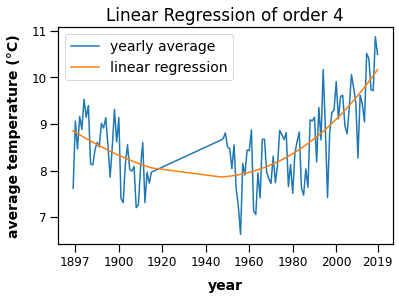

<Figure size 432x288 with 0 Axes>

In [19]:
order = 4
poly_reg = PolynomialFeatures(degree=order)
X_poly = poly_reg.fit_transform(x)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

plt.plot(x, y, label='yearly average')
plt.plot(x, pol_reg.predict(poly_reg.fit_transform(x)), label='linear regression')
plt.xticks([1880,1900,1920,1940,1960,1980,2000,2019], [1897,1900,1920,1940,1960,1980,2000,2019])
plt.title('Linear Regression of order {}'.format(order))
plt.xlabel('year')
plt.ylabel('average temperature (°C)')
plt.legend()
plt.show()
plt.savefig('Figures/TemTrend.png',dpi=300)

From the previous figure it is obvious that the temperature average increased between 1879 and 2019.

We can calculate the residual between the fitted polynomial $p_t$ and the actual time series $y_t$ for each year $t$, which allows to measure the goodness-of-fit using the mean sum of the squared residuals (MSQ):
$$
\sqrt{\frac{1}{n}\sum_{t=1}^{n}(y_t-p_t)^2}.
$$
A smaller value indicates a better polynomial approximation.
For the given approximation we can calculate the *goodness-of-fit measure*:

In [20]:
p = pol_reg.predict(poly_reg.fit_transform(x))
L = (y-p)**2
L2 = [(1/(i+1))*L[i] for i in range(len(L))]
print('goodness-of-fit measure:',np.sqrt(sum(L2)))

goodness-of-fit measure: [1.62267478]


Changing the order above and re-running the previous two cells shows the dependence of the goodness of the polynomial approximation on the order of the polynomial.

### Trend Curves

Next, we want to produce some trend curves, as described in chapter 2. This is done by computing *moving averages* over $k$ years with $k=2l+1$. We can calculate a trend temperature $m_t$ in a time interval $[t-l,t+t]$ as an average over $k$ years centered at $t$ and weighting the endpoints by $\frac{1}{2}$:
$$
m_t = \frac{1}{2l}\left(\frac{1}{2}y_{t-l}+y_{t-l+1}+\dots+y_t+\dots+y_{t+l-1}+\frac{1}{2}y_{t+l}\right).
$$
The folowing function computes for a time series $\texttt{x}$ the trend over $\texttt{k}$ years:

In [21]:
def trend(x,k):
    #computes the trend function for a time series x for k years, k needs to be odd!
    l = int((k-1)/2)
    y = np.zeros(len(x)-2*l)
    for i in range(len(x)-2*l):
        t = i+l
        y[i] = sum(x[t-l+1:t+l]) + 0.5*(x[t-l]+x[t+l])
    return 1/(2*l)*y

In [22]:
def trendPlot(k):
    
    z = trend(y,k)
    l = int((k-1)/2)
    plt.plot(x[l:-l],z,label='centered moving averages')
    
    plt.plot(x, y, label='yearly average')
    plt.xticks([1880,1900,1920,1940,1960,1980,2000,2019], [1897,1900,1920,1940,1960,1980,2000,2019])
    plt.title('Yearly average temperature and trend with means of {} years'.format(k))
    plt.xlabel('year')
    plt.ylabel('average temperature (°C)')
    plt.legend()
    plt.savefig('Figures/TempTrendCurve.png',dpi=300)

interactive_plot = interactive(trendPlot,k=widgets.IntSlider(min=3, max=11, step=2, value=1,continuous_update=False))
interactive_plot.children[0].description=r'Choose k' # slider interactive_plot
display(interactive_plot)

interactive(children=(IntSlider(value=3, continuous_update=False, description='Choose k', max=11, min=3, step=…

### Oscillations

It is also interesting to look at the oscillation of climatological series over the years. These are calculated considering moving 10-year blocks $[t-9,t]$ and calcualting the standard deviation for each block.
In the next plot, we can see how much the average temperature oscillates.

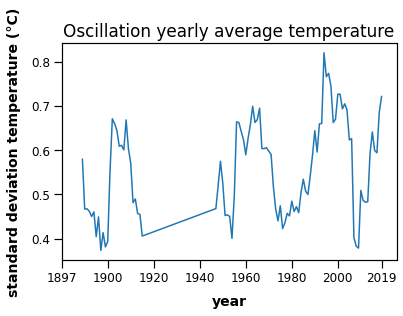

In [23]:
def Oscillation(x,k):
    y = np.zeros(len(x)-k)
    for i in range(len(x)-k):
        t = i+k
        y[i] = np.std(x[t-k:t+1])
    return y

Oscillation(y[:,0],9)

plt.plot(x[10:], Oscillation(y[:,0],10))
plt.xticks([1880,1900,1920,1940,1960,1980,2000,2019], [1897,1900,1920,1940,1960,1980,2000,2019])
plt.xlabel('year')
plt.ylabel('standard deviation temperature (°C)')
plt.title('Oscillation yearly average temperature')
plt.savefig('Figures/TemperatureOscillation.png',dpi=300)

### Correlation

Next we look at the correlation. This is an indication for how the value of a parameter $y_t$ at time point $t$ is correlated with the value $y_{t+1}$ at time point $t+1$. We therefore make a scatter plot of $y_t$ against $y_{t+1}$ and calculate the correlation coefficient using the numpy function $\texttt{corrcoef}$.

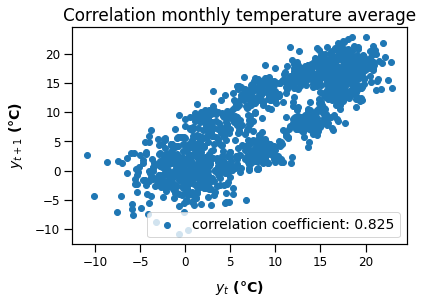

In [24]:
mt = pd.to_numeric(df['average temperature']).groupby(['year','month']).agg(['mean'])['mean'] #monthly mean temperature

corr = np.corrcoef(mt[:-1],mt[1:])[0,1]
plt.scatter(mt[:-1],mt[1:],label='correlation coefficient: {:.3f}'.format(corr))
plt.xlabel('$y_t$ (°C)')
plt.ylabel('$y_{t+1}$ (°C)')
plt.legend()
plt.title('Correlation monthly temperature average')
plt.savefig('Figures/TempCorrel.png',dpi=300)

We notice that the correlation coefficient is $r \approx 0.825$. The large value is caused by seasonal effects, i.e. to the course of the monthly temperatures over the calendar year. It thus contains redundant information. To overcome this effect, we can adjust the temperatures seasonally by subtracting the monthly average temperatures over all considered years.

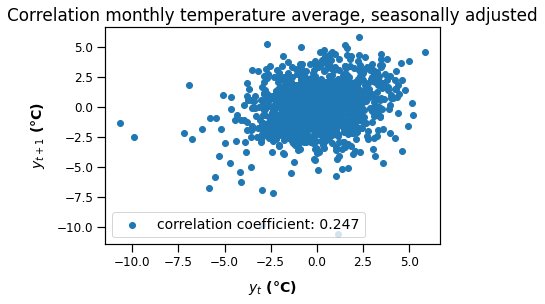

In [25]:
tempData = df['average temperature'] #get data frame with just average temperature
tempData.dropna(inplace=True) 
av = pd.to_numeric(tempData).groupby(['month']).agg(['mean'])
d1 = pd.DataFrame(mt)
rr = d1-av

corr = np.corrcoef(rr['mean'][:-1],rr['mean'][1:])[0,1]
plt.scatter(rr[:-1],rr[1:],label='correlation coefficient: {:.3f}'.format(corr))
plt.xlabel('$y_t$ (°C)')
plt.ylabel('$y_{t+1}$ (°C)')
plt.legend()
plt.title('Correlation monthly temperature average, seasonally adjusted')
plt.savefig('Figures/TempCorrelSeasonallyAdj.png',dpi=300)

We notice that the correlation coefficient decreases to $r \approx 0.247$ when removing seasonal effects.